Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$

## Aluno: Luiz Eduardo Hupalo (17203887)

# Exercício 6: Redes Neurais

Neste exercício você irá construir modelos de redes neurais para realizar classificação e regressão.

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],np.zeros(np.sum(y==classes[i])),colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],X[y==classes[i],1],colors[i])
    return

def plot_boundary(model, X, colors=['b','r','g','m','c','y'], N=400, gap=1e-9):
    ''' Plot boundary for a 1-D or 2-D classifier '''
    assert len(X.shape) == 2
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        X = np.c_[xx1.reshape(-1)]
    else:
        X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    y_pred = model.predict(X)
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    y_pred = enc.fit_transform(y_pred)
    assert len(enc.classes_) <= len(colors)
    levels = np.arange(len(enc.classes_)+1)-0.5
    y_pred = y_pred.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_pred,levels,colors=colors,alpha=0.25)
    plt.contour(xx1,xx2,y_pred,levels,colors='k',linewidths=1)
    return

# Conjunto de dados #1

O primeiro conjunto de dados é gerado pelos comandos abaixo.

(300, 2) (300,)
(100, 2) (100,)


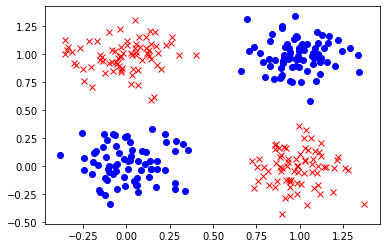

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/4, random_state=0)
plot_data(X_train,y_train)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

## Regressão logística

Para fins de comparação, utilize primeiramente um modelo de regressão logística sem regularização através da biblioteca sklearn. Para este e demais modelos deste exercício, realize o treinamento sempre usando o método de otimização L-BFGS (`solver='lbfgs'`), inclusive quando utilizar redes neurais.

Training accuracy: 0.49333333333333335
Validation accuracy: 0.45


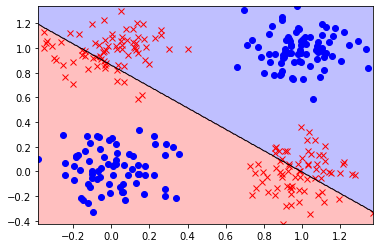

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X_train, y_train)
plot_data(X_train, y_train)
plot_boundary(model, X_train)
print('Training accuracy:',model.score(X_train, y_train))
print('Validation accuracy:',model.score(X_val, y_val))

- Obtenha os pesos $b$ e $\bw$ do modelo treinado.
- Determine o valor da função custo (perda) ao fim do treinamento. Como esse valor não é fornecido automaticamente pelo modelo, utilize as funções `.predict_proba()` e `sklearn.metrics.log_loss`.

In [4]:
print("w: ", model.coef_)
print("b: ", model.intercept_)

w:  [[-0.14072583 -0.16260896]]
b:  [0.13996416]


In [5]:
from sklearn.metrics import log_loss
print("coefs: ", model.predict_proba(model.coef_))
print("log_loss: ", log_loss(y_train, X_train))

coefs:  [[0.45358165 0.54641835]]
log_loss:  7.442421850087615


Em seguida, utilize uma rede neural de 1 camada (nenhuma camada oculta) com ativação de saída logística e sem regularização, sempre com `solver='lbfgs'`. Note que o parâmetro `activation` refere-se à ativação das camadas ocultas e portanto é irrelevante neste caso particular, podendo ser escolhido como `'identity'`, o que corresponde a uma ativação linear. Note também que `alpha` é o parâmetro de regularização, equivalente a `1/C`. 

Training accuracy: 0.49333333333333335
Validation accuracy: 0.45


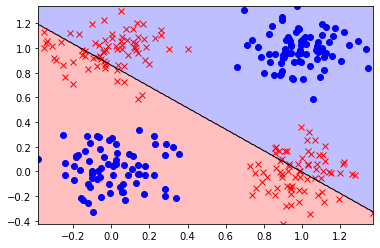

In [6]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=[], activation='identity', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_data(X_train, y_train)
plot_boundary(model, X_train)
print('Training accuracy:',model.score(X_train, y_train))
print('Validation accuracy:',model.score(X_val, y_val))

- Confirme que os dois modelos são aproximadamente idênticos. Para isso, obtenha os parâmetros do modelo, o valor da função perda ao final do treinamento, e o tipo da função de ativação de saída. Dica: veja a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). (Obs: ao contrário da maior parte da literatura, a sklearn contabiliza a camada de entrada no número de camadas da rede.)

In [7]:
print("w: ", model.coefs_)
print("b: ", model.intercepts_)
print("log_loss: ", log_loss(y_train, X_train))
print("ativação de saida: ",model.out_activation_)

w:  [array([[-0.14074325],
       [-0.16263907]])]
b:  [array([0.13997272])]
log_loss:  7.442421850087615
ativação de saida:  logistic


- Ainda com `activation='identity'`, o que acontece quando se aumenta o número de camadas ocultas e o número de unidades por camada (`hidden_layer_sizes`)? Por quê?

Train accuracy: 0.49333333333333335


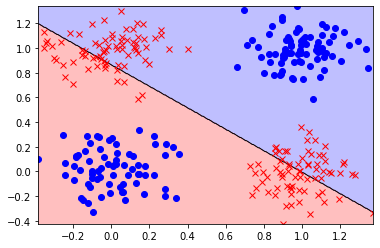

In [8]:
model = MLPClassifier(hidden_layer_sizes=(100,100,100,), activation='identity', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))

Quase não há alteração porque a ativação identidade mantém a linearidade do modelo.

- Em seguida, altere para ativação logística nas camadas ocultas, adicione uma camada oculta com 2 unidades, e treine novamente o modelo, possivelmente rodando diversas vezes até obter uma classificação praticamente perfeita (99% de acurácia).
- Você observa uma variância muito grande entre os modelos obtidos a cada treinamento? Por quê você acredita que isso ocorre? Explique.

Primeiro treinamento:

Train accuracy: 0.72


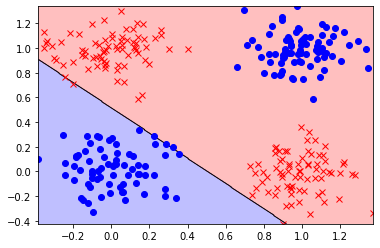

In [9]:
model = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))

Segundo treinamento:

Train accuracy: 0.9933333333333333


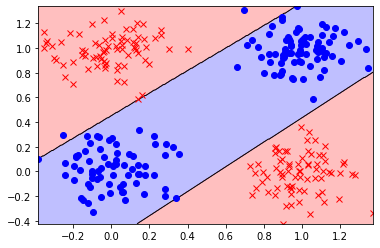

In [10]:
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))

- Agora, experimente aumentar o número de unidades da camada oculta (mantendo ainda uma única camada oculta) e observe as regiões obtidas a cada novo treinamento. Em seguida, varie também o parâmetro de regularização até encontrar uma configuração em que os modelos obtidos são praticamente invariantes a cada nova realização do treinamento.

Primeiro treinamento:

Train accuracy: 1.0


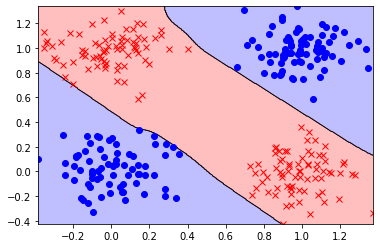

In [11]:
model = MLPClassifier(hidden_layer_sizes=[10], activation='logistic', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))

Segundo treinamento:

Train accuracy: 1.0


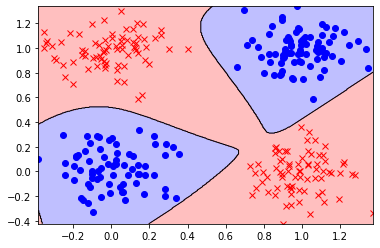

In [12]:
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))

# Conjuntos de dados #2

O próximo conjunto de dados pode ser carregado pelo comando abaixo. Para simplificar, não usaremos conjunto de teste.

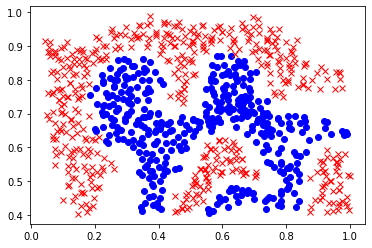

In [13]:
data = loadmat('data/svm2.mat')
X, y = data['X'], data['y'].reshape(-1)
plot_data(X,y)

- De forma a demonstrar a flexibilidade das redes neurais, o seu objetivo aqui é obter 100% de acurácia neste conjunto de dados. Utilize uma rede neural com 1 única camada oculta com ativação logística, mas adicione quantas unidades forem necessárias. Provavelmente você precisará também aumentar o número de iterações do treinamento, através do parâmetro `max_iter`.

Train accuracy: 1.0


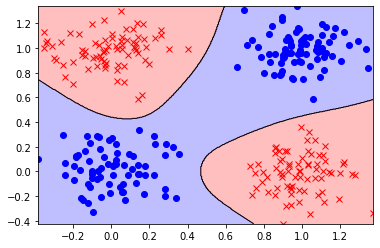

In [14]:
model = MLPClassifier(hidden_layer_sizes=[4], activation='logistic', solver='lbfgs', alpha=0.001, max_iter = 1000)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))

# Conjuntos de dados #3

O próximo conjunto de dados pode ser carregado pelo comando abaixo e corresponde a um problema de regressão.

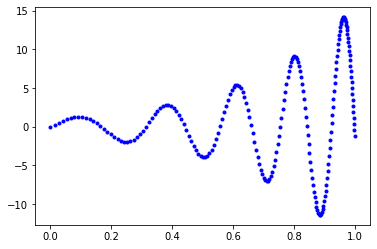

In [15]:
def gen_data(n_samples=200, noise=0.0):
    '''Generate univariate regression dataset'''
    np.random.seed(0)
    x = np.random.permutation(1-np.exp(-np.linspace(0,2.5,n_samples)))
    y = np.sin(2*np.pi*3*np.exp(x))*np.exp(3*x) + noise*np.random.randn(n_samples)
    x = x/x.max()
    X = x.reshape(-1,1)
    return X, y

def plot_prediction(model, X, y, prediction_points=False, N=1000):
    '''Plot dataset and predictions for a univariate regression model'''
    assert len(X.shape) == 2 and len(y.shape) == 1
    plt.plot(X[:,0],y,'b.'); plt.xlabel('x'); plt.ylabel('y');
    if N is not None:
        xx = np.linspace(X.min(),X.max(),N)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,'r-')
    if prediction_points:
        y_pred = model.predict(X)
        plt.plot(X[:,0],y_pred,'r.')
    plt.legend(['True', 'Predicted'])
    return

X, y = gen_data()
plt.plot(X[:,0],y,'b.');

- Utilize uma rede neural com ativação de saída linear e perda quadrática (modelo [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) da sklearn) para obter um ajuste praticamente perfeito, em particular, com RMSE inferior a 0.2. (Mostre o RMSE obtido.) Fique à vontade para aumentar o número de camadas/unidades/iterações, bem como experimentar outras funções de ativação. Note que o caso abaixo corresponde a uma regressão linear.

R2 score: 0.9999802717776671


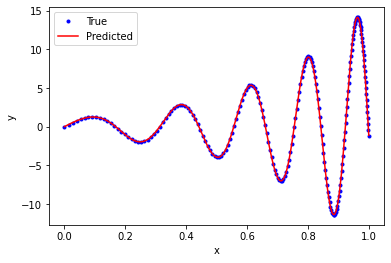

In [16]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[50], activation='logistic', solver='lbfgs', alpha=0.001, max_iter=10000)
model.fit(X,y)
plot_prediction(model,X,y)
print('R2 score:',model.score(X,y))

- Em seguida, observe as funções (do único atributo de entrada, $x$) produzidas pelas unidades da primeira camada oculta. Para isso, complete o código abaixo, onde $a = g(\bw^T \bx + b)$ representa a ativação produzida pela unidade.

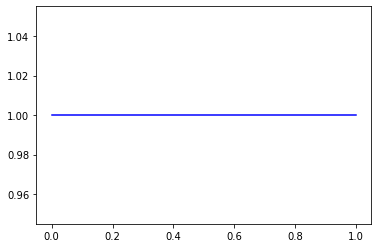

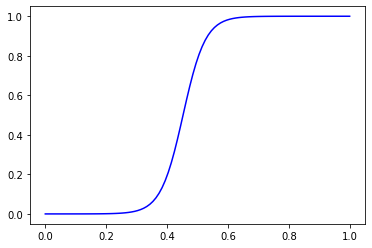

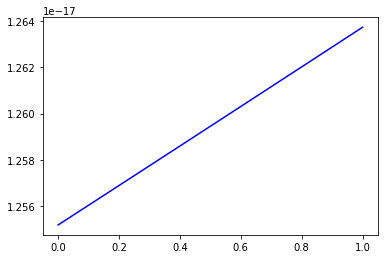

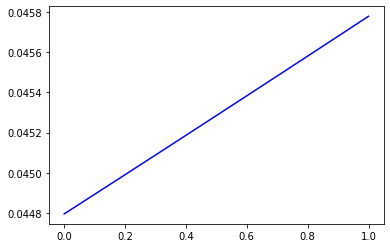

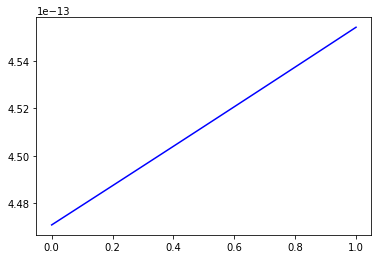

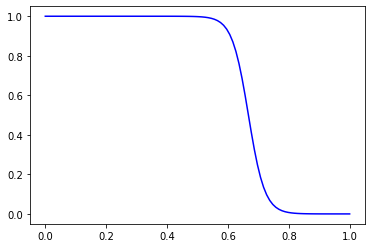

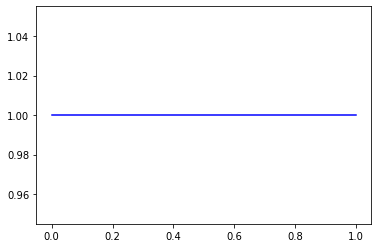

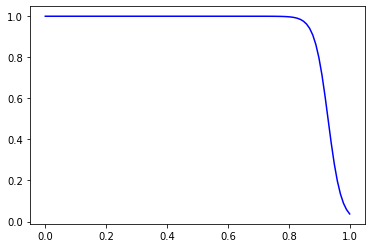

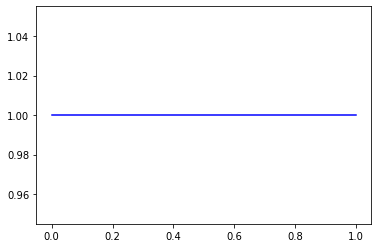

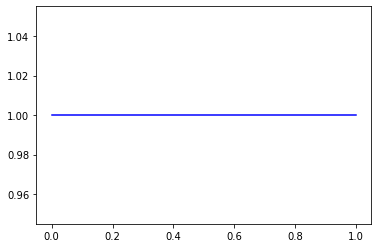

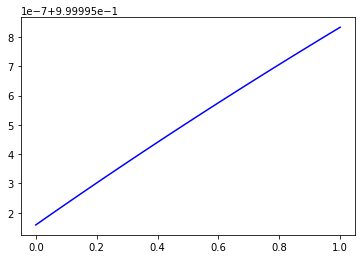

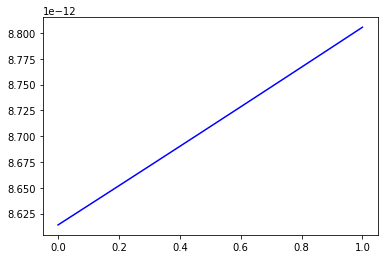

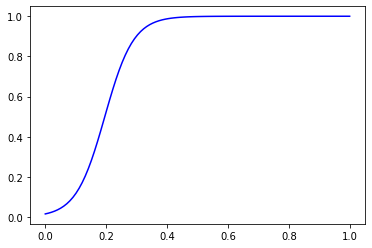

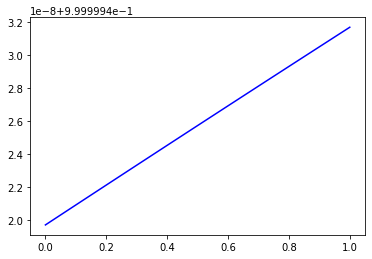

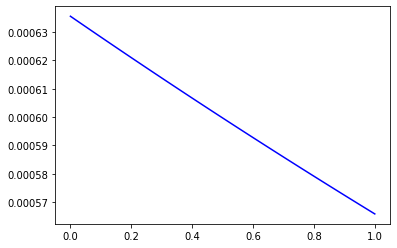

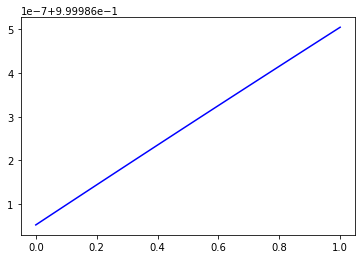

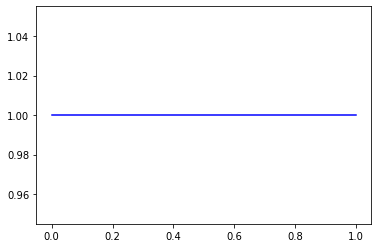

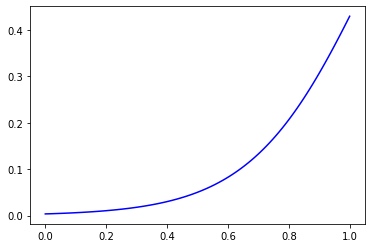

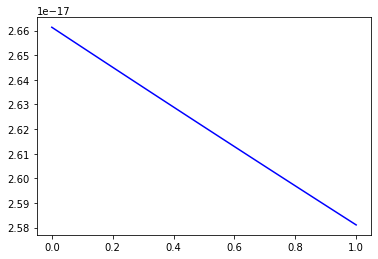

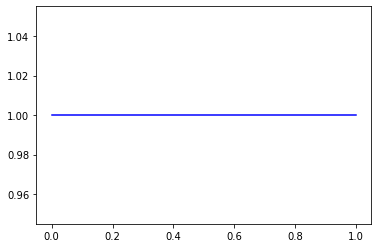

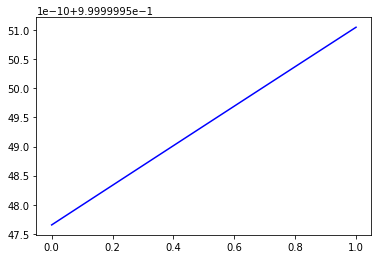

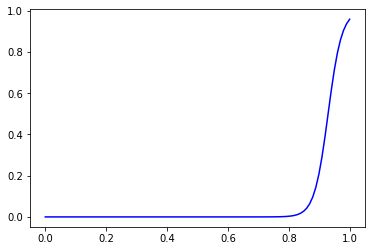

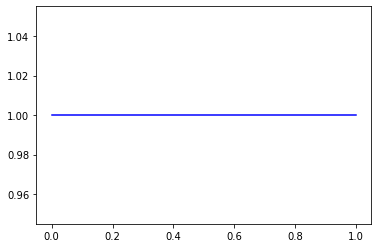

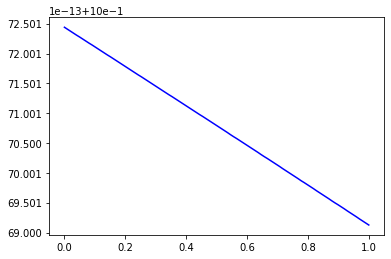

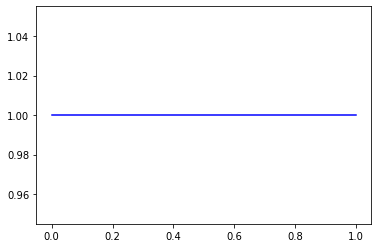

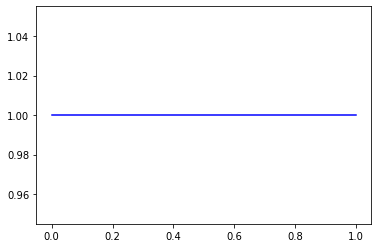

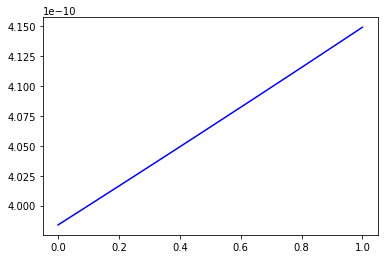

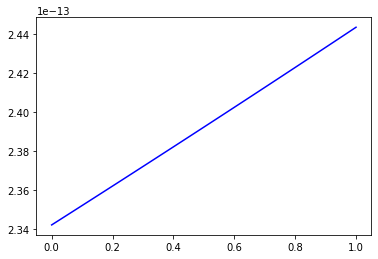

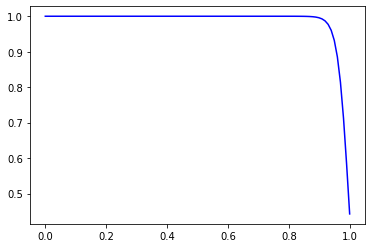

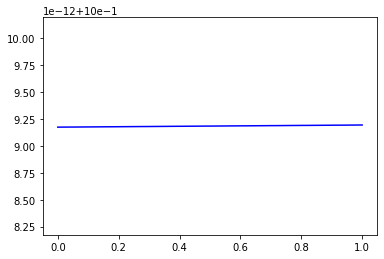

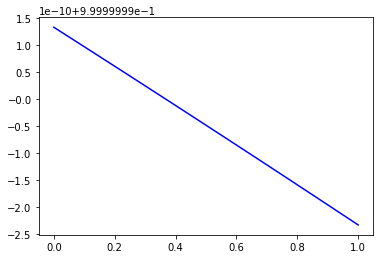

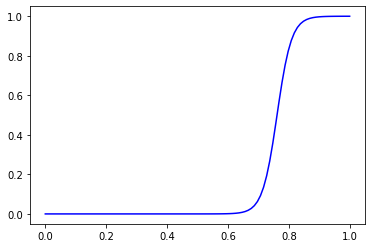

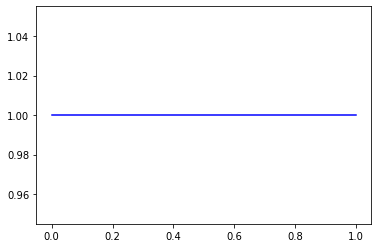

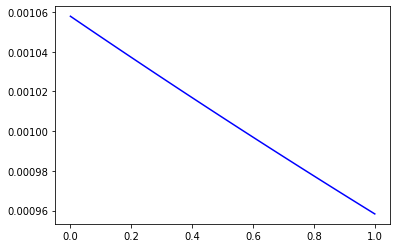

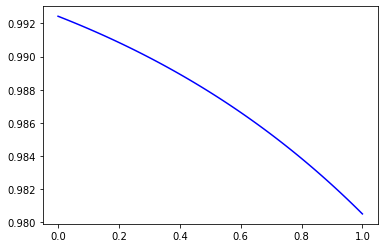

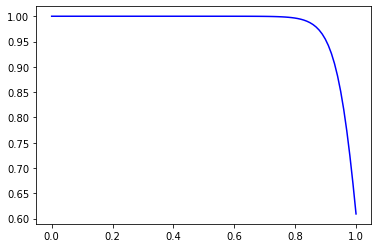

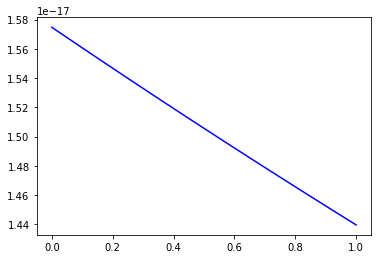

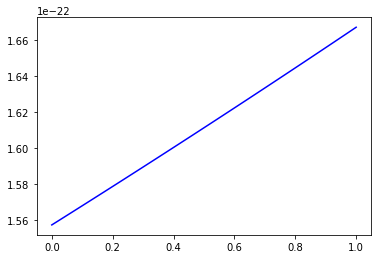

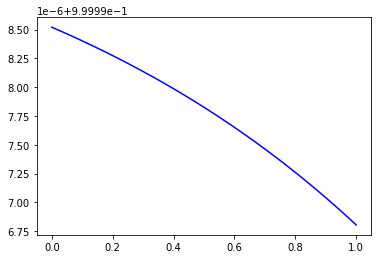

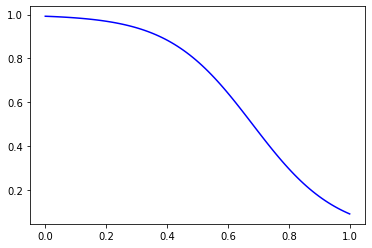

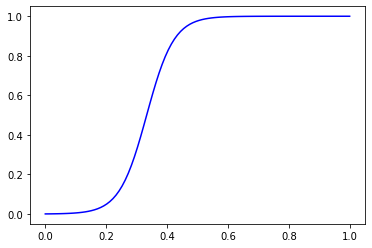

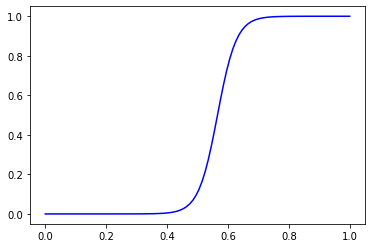

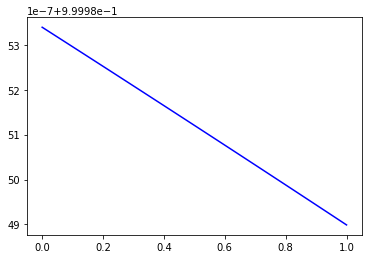

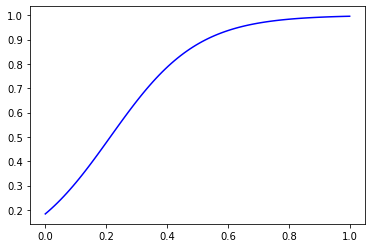

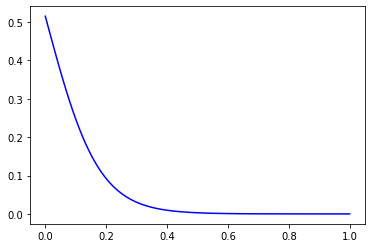

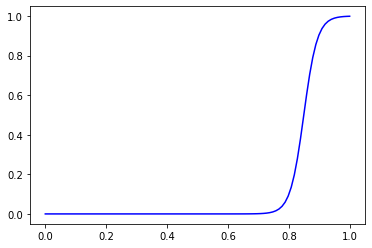

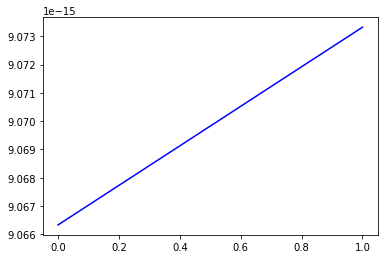

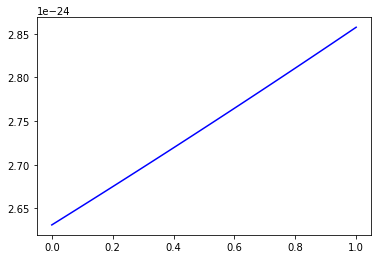

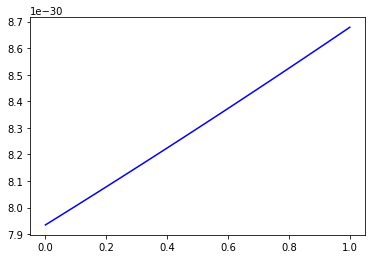

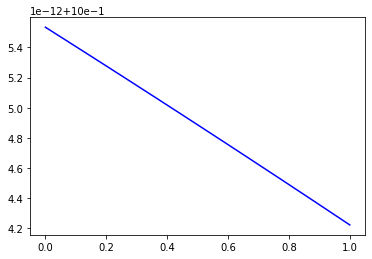

In [17]:
from scipy.special import expit as sigmoid
if model.n_layers_ < 3: raise RuntimeError('Must use at least one hidden layer')
for i in range(model.intercepts_[0].shape[0]):
    b = model.intercepts_[0][i]
    w = model.coefs_[0][0,i]
    x = np.linspace(0,1,100)
    a = sigmoid(w*x+b)
    plt.plot(x,a,'b-')
    plt.show()

# Conjuntos de dados #4

O último conjunto de dados é formado por imagens de gatos ($y=1$) e não-gatos ($y=0$), cada uma com 64x64x3 pixels (3 canais RGB), com valores de intensidade inteiros entre 0 e 255. As imagens já estão separadas em um conjunto de treinamento com 209 amostras e um conjunto de teste com 50 amostras.

In [18]:
import h5py
train_data = h5py.File('data/train_catvnoncat.h5', 'r')
train_images = train_data['train_set_x'][:]
train_labels = train_data['train_set_y'][:]
test_data = h5py.File('data/test_catvnoncat.h5', 'r')
test_images = test_data['test_set_x'][:]
test_labels = test_data['test_set_y'][:]

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(train_images.min())
print(train_images.max())

(209, 64, 64, 3) (209,)
(50, 64, 64, 3) (50,)
0
255


1


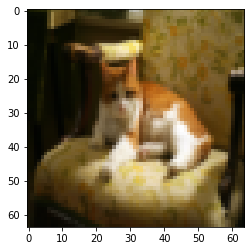

In [19]:
# Exemplo de uma imagem
i = 7
plt.imshow(train_images[i])
print(train_labels[i])

Como cada conjunto de dados é um array 4-D com dimensões $m \times 64 \times 64 \times 3$, devemos primeiramente convertê-los em uma matriz de atributos com dimensões $m \times 12288$. Além disso, é uma boa prática normalizar os dados, o que, nesse caso, pode ser feito simplesmente dividindo-se cada atributo por 255, de forma que cada atributo esteja na faixa [0,1].

In [20]:
X_train = train_images
X_train = X_train.reshape(X_train.shape[0],-1)/255
y_train = train_labels

X_test = test_images
X_test = X_test.reshape(X_test.shape[0],-1)/255
y_test = test_labels

In [36]:
X_test.shape

(50, 12288)

- Seu objetivo para esta questão é obter pelo menos **72% de acurácia** no conjunto de teste.

In [24]:
model = MLPClassifier(hidden_layer_sizes=[10], activation='logistic', solver='lbfgs', alpha=0.1, max_iter = 200)
model.fit(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.68


/home/luiz/codigos/estudos_ml/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


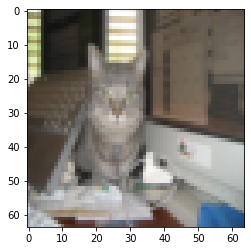

In [54]:
# Exemplo de uma imagem
i = 7
plt.imshow(test_images[i])

In [55]:
model.predict(X_test[i][:].reshape(1,-1))

array([1])